#imports

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Load Data set

In [2]:
x_train=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Learning with SKT sir/Data/cats and dog 2000+400/input.csv', delimiter=',')
y_train=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Learning with SKT sir/Data/cats and dog 2000+400/labels.csv', delimiter=',')
x_test=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Learning with SKT sir/Data/cats and dog 2000+400/input_test.csv', delimiter=',')
y_test=np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Learning with SKT sir/Data/cats and dog 2000+400/labels_test.csv', delimiter=',')

In [3]:
print ("shape of x_train :", x_train.shape)
print ("shape of y_train :", y_train.shape)
print ("shape of x_test :", x_test.shape)
print ("shape of y_test :", y_test.shape)

shape of x_train : (2000, 30000)
shape of y_train : (2000,)
shape of x_test : (400, 30000)
shape of y_test : (400,)


#Reshaping and manupulating files

In [4]:
# Reshaping
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)
print ("shape of x_train :", x_train.shape)
print ("shape of y_train :", y_train.shape)
print ("shape of x_test :", x_test.shape)
print ("shape of y_test :", y_test.shape)

shape of x_train : (2000, 100, 100, 3)
shape of y_train : (2000, 1)
shape of x_test : (400, 100, 100, 3)
shape of y_test : (400, 1)


In [5]:
#Scaling
x_train=x_train/255
x_test=x_test/255

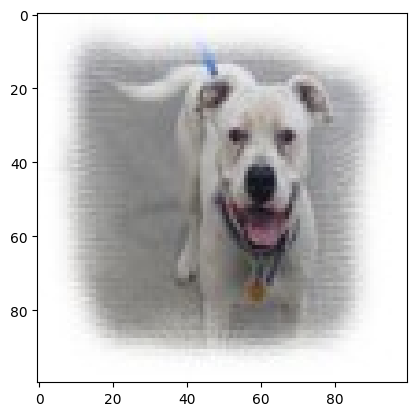

In [7]:
plt.imshow(x_train[6, :])
plt.show()

#Model

In [8]:
model= Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# other way of creating the same model
model= Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
#opt= keras.optimizers.SGD(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Training & testing

In [10]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 736ms/step - accuracy: 0.5126 - loss: 0.8933
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 706ms/step - accuracy: 0.5011 - loss: 0.6914
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 703ms/step - accuracy: 0.5707 - loss: 0.6792
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 672ms/step - accuracy: 0.6526 - loss: 0.6366
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 723ms/step - accuracy: 0.6896 - loss: 0.6039
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 672ms/step - accuracy: 0.7202 - loss: 0.5516
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 667ms/step - accuracy: 0.7355 - loss: 0.5182
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 733ms/step - accuracy: 0.7446 - loss: 0.5158
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 733ms/step - accuracy: 0.7998 - loss: 0.4590
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 676ms/step - accuracy: 0.8222 - loss: 0.4135


In [11]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6760 - loss: 0.5911


[0.5797722339630127, 0.6899999976158142]

#Using

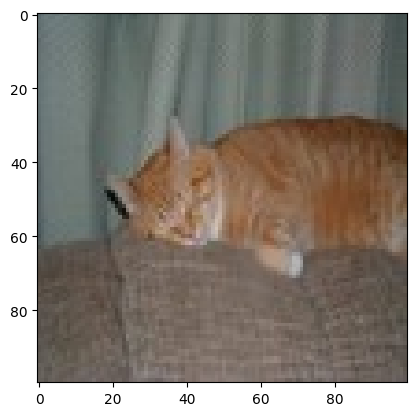

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Cat


In [18]:
idx=random.randint(0, len(x_test))
plt.imshow(x_test[idx, :])
plt.show()

y_pred=model.predict(x_test[idx, :].reshape(1, 100, 100 ,3))
if(y_pred>0.5):
  print("Cat")
else:
  print("Dog")